# Basic Time Series Models - Lab

## Introduction

Now that you have some basic understanding of the white noise and random walk models, its time for you to implement them! 

## Objectives

In this lab you will: 

- Generate and analyze a white noise model 
- Generate and analyze a random walk model 
- Implement differencing in a random walk model 


## A White Noise model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September, and October of 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day 
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes  
- Create and visualize a time series that reflects this information 

Let's import `pandas`, `numpy`, and `matplotlib.pyplot` using their standard alias. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Do not change this seed
np.random.seed(12) 

Create the dates. You can do this using the `date_range()` function Pandas. More info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [4]:
# Create dates
dates = pd.date_range('2018-08-01','2018-10-31', freq='D' )

In [5]:
dates

DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04',
               '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01',
               '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05',
               '2018-09-06', '2018-09-07', '2018-09-08', '2018-09-09',
               '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17',
               '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
      

Generate the values for the white noise process representing Nina's commute in August and September.

In [7]:
# Generate values for white noise
randomVals = np.random.normal(25,4,92)
randomVals
commute = randomVals

Create a time series with the dates and the commute times.

In [11]:
# Create a time series
data = pd.DataFrame(data = commute, index = dates)
data.columns = ['communte_mins']
data.head()

,communte_mins
2018-08-01,22.244485
2018-08-02,28.210522
2018-08-03,26.089564
2018-08-04,21.123294
2018-08-05,28.487872


Visualize the time series and set appropriate axis labels.

<AxesSubplot:>

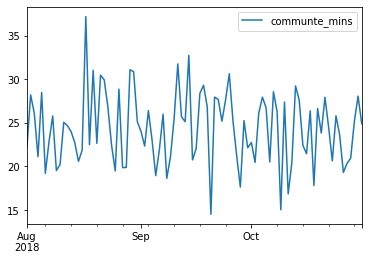

In [12]:
# Visualize the time series 
data.plot()

Print Nina's shortest and longest commute.

In [14]:
# Shortest commute
data.min()

communte_mins    14.522027
dtype: float64

In [15]:
# Longest commute
data.max()

communte_mins    37.166745
dtype: float64

Look at the distribution of commute times.

array([[<AxesSubplot:title={'center':'communte_mins'}>]], dtype=object)

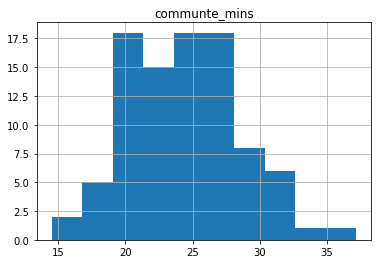

In [16]:
# Distribution of commute times
data.hist()

Compute the mean and standard deviation of `commute_series`. The fact that the mean and standard error are constant over time is crucial!

In [17]:
# Mean of commute_series
data.mean()

communte_mins    24.373433
dtype: float64

In [18]:
# Standard deviation of commute_series
data.std()

communte_mins    4.147899
dtype: float64

Now, let's look at the mean and standard deviation for August and October.  

In [20]:
# Mean and standard deviation for August and October
august = data['2018-08-01':'2018-08-31']
october = data['2018-10-01':'2018-10-31']
print(august.mean(), august.std())
print()
print(october.mean(), october.std())

communte_mins    24.867409
dtype: float64 communte_mins    4.478207
dtype: float64

communte_mins    23.733632
dtype: float64 communte_mins    3.769916
dtype: float64


Because you've generated this data, you know that the mean and standard deviation will be the same over time. However, comparing mean and standard deviation over time is useful practice for real data examples to check if a process is white noise!

## A Random Walk model 

Recall that a random walk model has: 

- No specified mean or variance 
- A strong dependence over time 

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model: 

Starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) on January 1 2010 until end of November of the same year, generate a random walk model with a white noise error term, which has a standard deviation of 10.

In [46]:
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range('2010-01-01', '2010-11-30', freq = 'D')
numOfDays = len(dates)
# White noise error term
error = np.random.normal(0, 10, numOfDays)

# Define random walk
def random_walk(start, error):        
    values = []
    runningTotal = start
    for x in error:
        runningTotal += x
        values.append(runningTotal)
    return values
shares_value = random_walk(1000, error)

shares_series = pd.Series(shares_value, index=dates)

Visualize the time series with correct axis labels. 

<AxesSubplot:>

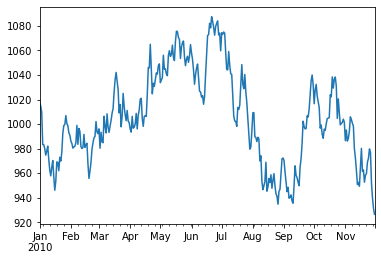

In [47]:
# Your code here
shares_series.plot()

You can see how this very much looks like the exchange rate series you looked at in the lesson!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [57]:
# Keep the random seed
np.random.seed(11)
def random_walk_drift(start, error, drift):        
    values = []
    runningTotal = start
    error_with_drift = error+drift
    for x in error_with_drift:
        runningTotal += error_with_drift
        values.append(runningTotal)
    return values

shares_series_drift = random_walk(1000,error+8)
shares_series_drift = pd.Series(shares_series_drift, index=dates)

In [58]:
random_walk(1000, error+8)

[1025.4945474130518,
 1030.6338174448888,
 1033.7881661226772,
 1015.2549805300624,
 1023.172134236333,
 1027.97582059869,
 1030.6095269763427,
 1041.7635536605997,
 1053.9740608231543,
 1051.318031018666,
 1050.4556343191114,
 1053.6982993922775,
 1068.5951224942917,
 1082.2070442546244,
 1077.1515591568186,
 1073.9568065408225,
 1089.3251804531178,
 1113.0715211841607,
 1120.7607702994821,
 1121.9263040248297,
 1140.8826010100242,
 1145.7868346378177,
 1161.044356885808,
 1184.5350732195259,
 1198.83587144446,
 1207.570803814479,
 1222.8935173533314,
 1224.4677634289978,
 1230.6868316758735,
 1232.9472860817714,
 1238.9035329251496,
 1242.0385819240614,
 1248.1808286844714,
 1252.3754645168847,
 1261.2652408701076,
 1269.9019574843553,
 1280.865428565298,
 1302.8931397601366,
 1295.4245140841128,
 1316.3806999321394,
 1322.008195474671,
 1317.6847334086483,
 1323.9605357368741,
 1332.878919486168,
 1351.5545040566458,
 1348.9381595739274,
 1359.1116416536495,
 1368.2898366971838,
 13

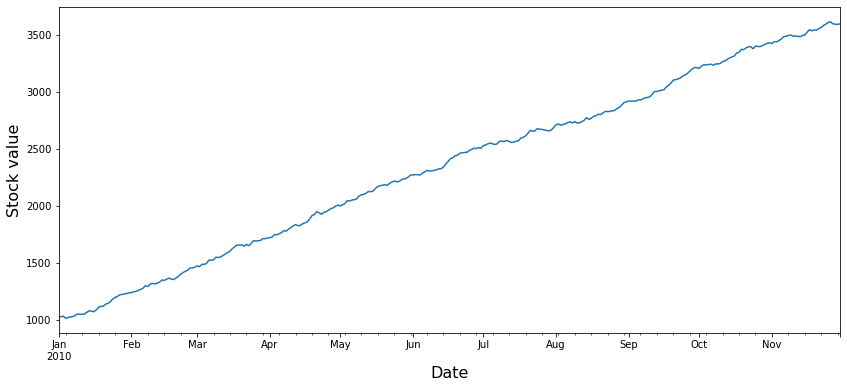

In [59]:
ax = shares_series_drift.plot(figsize=(14,6))
ax.set_ylabel('Stock value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show()

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the random walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series (time period of 1) for the shares time series (no drift).

<AxesSubplot:>

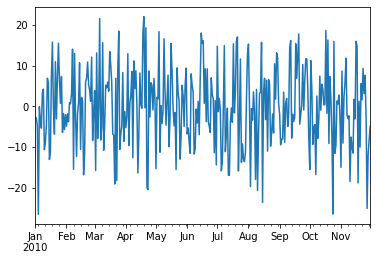

In [60]:
# Your code here
shares_series.diff(1).plot()

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

In [63]:
shares_series_drift

2010-01-01    1025.494547
2010-01-02    1030.633817
2010-01-03    1033.788166
2010-01-04    1015.254981
2010-01-05    1023.172134
                 ...     
2010-11-26    3616.709969
2010-11-27    3599.629037
2010-11-28    3595.778208
2010-11-29    3595.228888
2010-11-30    3598.327392
Freq: D, Length: 334, dtype: float64

<AxesSubplot:>

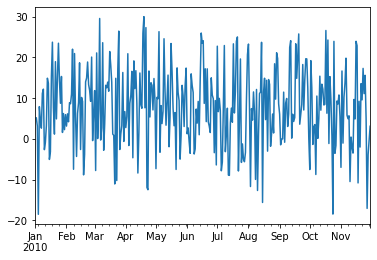

In [62]:
# Your code here 
shares_series_drift.diff(1).plot()

This is also a white noise series, but what can you tell about the mean? 

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how white noise and random walk models work!